In [1]:
amt_start

    amt_start at line 205 column 5
 
****************************************************************************
 
AMT version 1.2.0. (C) Piotr Majdak, Clara Hollomey, and contributors.
See http://amtoolbox.org for more information.
 
****************************************************************************
 
* LTFAT: LTFAT version 2.4.0. Copyright 2005-2018 Peter L. Søndergaard. For help, please type "ltfathelp". LTFAT is using the script language backend.
* Signal package: loaded.
OpenJDK 64-Bit Server VM warning: Archived non-system classes are disabled because the java.system.class.loader property is specified (value = "org.octave.OctClassLoader"). To use archived non-system classes, this property must be not be set
* Statistics package: loaded.
* Netcdf package: not found. Load this package and re-run amt_start.
* Optim package: loaded.
 
****************************************************************************
 
Starting optional third-party toolboxes:
* SOFA: warning: fun

In [2]:
amt_start('demo_uclChallenge')

 
****************************************************************************
 
AMT version 1.2.0. (C) Piotr Majdak, Clara Hollomey, and contributors.
See http://amtoolbox.org for more information.
 
****************************************************************************
 
* LTFAT: LTFAT version 2.4.0. Copyright 2005-2018 Peter L. Søndergaard. For help, please type "ltfathelp". LTFAT is using the script language backend.
* Signal package: loaded.
* Statistics package: loaded.
* Netcdf package: not found. Load this package and re-run amt_start.
* Optim package: loaded.
 
****************************************************************************
 
Starting optional third-party toolboxes:
* SOFA: SOFA Matlab/Octave API version 1.1.3. Copyright 2013 Acoustics Research Institute (piotr@majdak.com).
* SFS: Toolbox version 2.5.0 loaded
* CIRCSTAT: Circular statistics toolbox found.
* BINAURALSH: BinauralSH toolbox loaded.
 
*************************************************************

In [8]:
amt_mex

========= Compiling oct interfaces ==========
Compiling comp_adaptloop.cc
Compiling comp_meddishaircell.cc
Done.
========= Compiling MEX interfaces ==========
Compiling comp_auditoryfilterbank_singlefc.c
comp_auditoryfilterbank_singlefc.c:68:10: fatal error: matrix.h: No such file or directory
   68 | #include "matrix.h"
      |          ^~~~~~~~~~
compilation terminated.
Compiling comp_bruce2018_IHC.c
Compiling comp_bruce2018_Synapse.c
Compiling comp_karjalainen1996.c
Compiling comp_zilany2007.c
Compiling comp_zilany2014_IHC.c
Compiling comp_zilany2014_synapse.c
Done.
========= Compiling environments interfaces ==========
gcc -shared -fpic -O3 -ffast-math -o verhulst2012/tridiag.so verhulst2012/cochlea_utils.c
gcc -shared -fpic -O3 -ffast-math -o verhulst2015/tridiag.so verhulst2015/cochlea_utils.c
gcc -shared -fpic -O3 -ffast-math -o verhulst2018/tridiag.so verhulst2018/cochlea_utils.c

Done.


# Preparation for the Model

Set audiogram to simulate normal hearing

In [7]:
ag_fs = [125 250 500 1e3 2e3 4e3 8e3];
ag_dbloss = [0 0 0 0 0 0 0]; 

 what is the audiogram? 
 The frequency range for most audiogram normally go from 100Hz to 8000Hz, which is most essential for speech comprehension. 
 The "hearing ability" is expressed in dB HL (decibel hearing level), which measures "hearing loss." 
 0dB HL represents the average hearing threshold for people with normal hearing.

In [8]:
species = 'human'; % Human cochlear tuning (Shera et al., 2002)
numL = 10; numM = 10; numH = 30;



In [9]:
% Select the .wav file and its folder inside the auxdata

folderAux = 'bruce2018'
fileWav = 'defineit.wav'
[stim, Fs_stim] = amt_load(folderAux,fileWav);

amt_info(fileWav)

folderAux = bruce2018
fileWav = defineit.wav
No file found. Please check your search terms.


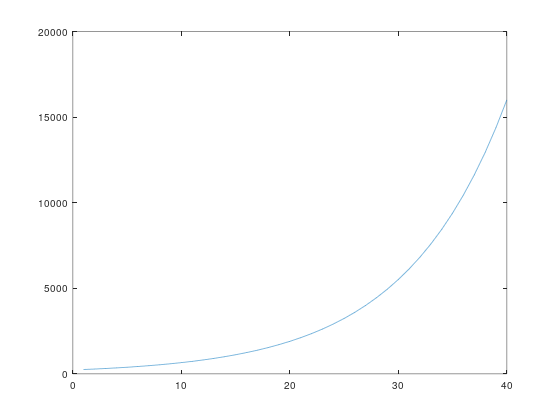

In [10]:
stimdb = 60; % SPL of speech (in dB) sound pressure level
stim = scaletodbspl(stim,stimdb);

% characteristic frequency (CF), the frequency at which the system is most responsive, or most
% sensitive, at low levels—the frequency with the lowest threshold
% the CF of a fiber is roughly the same as the resonant frequency of the part of the basilar membrane that it is attached to.
numCF = 40;
flow = 250;
fhigh = 16e3;

fc = logspace(log10(flow), log10(fhigh),numCF);
figure (); plot (fc);

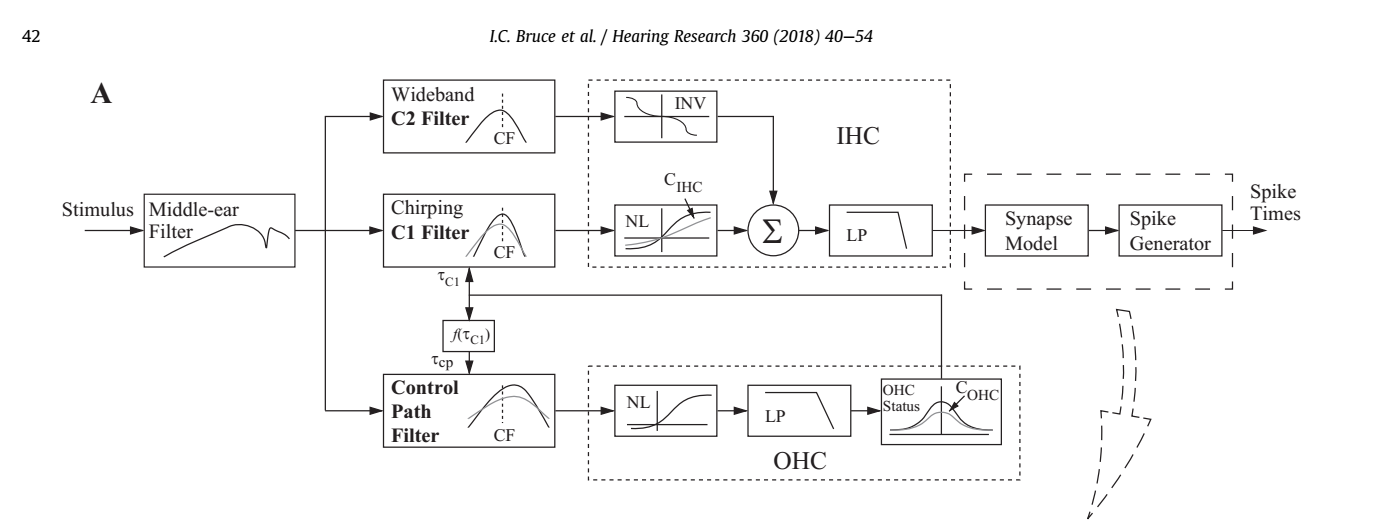

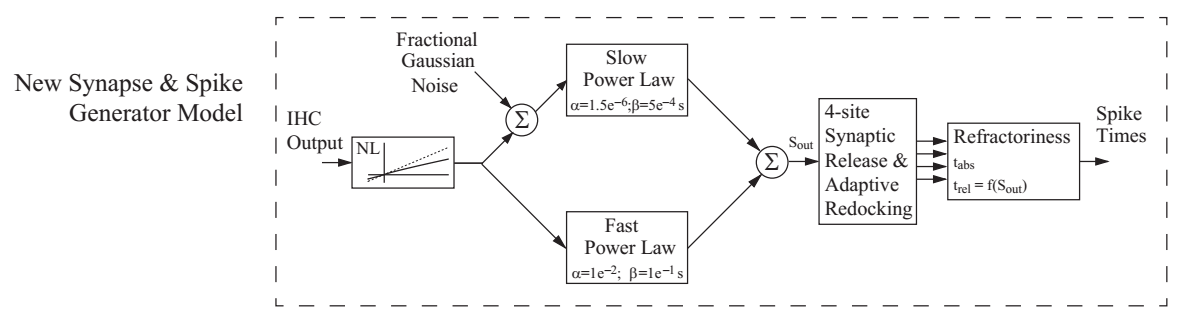

Images from: A phenomenological model of the synapse between the inner hair cell and auditory nerve: Implications of limited neurotransmitter release sites, Ian C. Bruce a, *, Yousof Erfani a, Muhammad S.A. Zilany, 2018.

In [11]:
out = bruce2018(stim, Fs_stim, fc, 'ag_fs', ag_fs, 'ag_dbloss', ag_dbloss, ...
  'numL', numL,'numM', numM,'numH', numH,'nrep',1,'outputPerCF');

flags =

  scalar structure containing the fields:

    species = human
    do_human =  1
    do_cat = 0
    fitHL = no_fitaudiogram
    do_no_fitaudiogram =  1
    do_fitaudiogram = 0
    output = outputPerCF
    do_outputPerCF =  1
    do_outputPerSynapse = 0
    noiseType = fixedFGn
    do_fixedFGn =  1
    do_varFGn = 0
    powerLawImp = approxPL
    do_approxPL =  1
    do_actualPL = 0
    SR = autoSR
    do_autoSR =  1
    do_specificSR = 0
    do_specificSRautoTiming = 0

info =

  scalar structure containing the fields:

    OHC_loss = [](0x0)
    IHC_loss = [](0x0)

output_len =  106950
CF = 1/40; spont = 1/50; SR = 0.2 spikesCF = 1/40; spont = 2/50; SR = 0.12358 spikesCF = 1/40; spont = 3/50; SR = 0.2 spikesCF = 1/40; spont = 4/50; SR = 0.001 spikesCF = 1/40; spont = 5/50; SR = 0.2 spikesCF = 1/40; spont = 6/50; SR = 0.17084 spikesCF = 1/40; spont = 7/50; SR = 0.2 spikesCF = 1/40; spont = 8/50; SR = 0.17872 spikesCF = 1/40; spont = 9/50; SR = 0.11657 spikesCF = 1/40; spont = 

CF = 4/40; spont = 1/50; SR = 0.086514 spikes/CF = 4/40; spont = 2/50; SR = 0.2 spikesCF = 4/40; spont = 3/50; SR = 0.001 spikesCF = 4/40; spont = 4/50; SR = 0.14097 spikesCF = 4/40; spont = 5/50; SR = 0.045339 spikes/CF = 4/40; spont = 6/50; SR = 0.001 spikesCF = 4/40; spont = 7/50; SR = 0.17015 spikesCF = 4/40; spont = 8/50; SR = 0.001 spikesCF = 4/40; spont = 9/50; SR = 0.13074 spikesCF = 4/40; spont = 10/50; SR = 0.2 spikes/CF = 4/40; spont = 11/50; SR = 7.4677 spikesCF = 4/40; spont = 12/50; SR = 4.8572 spikesCF = 4/40; spont = 13/50; SR = 3.8267 spikesCF = 4/40; spont = 14/50; SR = 2.5748 spikesCF = 4/40; spont = 15/50; SR = 5.3905 spikesCF = 4/40; spont = 16/50; SR = 5.1472 spikesCF = 4/40; spont = 17/50; SR = 0.2 spikes/CF = 4/40; spont = 18/50; SR = 0.2 spikes/CF = 4/40; spont = 19/50; SR = 8.4387 spikesCF = 4/40; spont = 20/50; SR = 5.2205 spikesCF = 4/40; spont = 21/50; SR = 112.8408 spikesCF = 4/40; spont = 22/50; SR = 56.3823 spikes/CF = 4/40; spont = 23/50; SR = 37.6741 s

CF = 7/40; spont = 1/50; SR = 0.19095 spikesCF = 7/40; spont = 2/50; SR = 0.11507 spikesCF = 7/40; spont = 3/50; SR = 0.14466 spikesCF = 7/40; spont = 4/50; SR = 0.11713 spikesCF = 7/40; spont = 5/50; SR = 0.001 spikesCF = 7/40; spont = 6/50; SR = 0.18439 spikesCF = 7/40; spont = 7/50; SR = 0.2 spikesCF = 7/40; spont = 8/50; SR = 0.098254 spikes/CF = 7/40; spont = 9/50; SR = 0.19707 spikesCF = 7/40; spont = 10/50; SR = 0.18631 spikes/CF = 7/40; spont = 11/50; SR = 6.3127 spikesCF = 7/40; spont = 12/50; SR = 2.8556 spikesCF = 7/40; spont = 13/50; SR = 4.6938 spikesCF = 7/40; spont = 14/50; SR = 3.6593 spikesCF = 7/40; spont = 15/50; SR = 0.2842 spikesCF = 7/40; spont = 16/50; SR = 8.1245 spikesCF = 7/40; spont = 17/50; SR = 6.0792 spikesCF = 7/40; spont = 18/50; SR = 0.2 spikes/CF = 7/40; spont = 19/50; SR = 6.0506 spikesCF = 7/40; spont = 20/50; SR = 10.6388 spikes/CF = 7/40; spont = 21/50; SR = 135.7625 spikesCF = 7/40; spont = 22/50; SR = 101.5979 spikesCF = 7/40; spont = 23/50; SR =

CF = 10/40; spont = 1/50; SR = 0.16503 spikes/CF = 10/40; spont = 2/50; SR = 0.001 spikes/CF = 10/40; spont = 3/50; SR = 0.13547 spikes/CF = 10/40; spont = 4/50; SR = 0.015321 spikesCF = 10/40; spont = 5/50; SR = 0.11728 spikes/CF = 10/40; spont = 6/50; SR = 0.001 spikes/CF = 10/40; spont = 7/50; SR = 0.001 spikes/CF = 10/40; spont = 8/50; SR = 0.2 spikes/CF = 10/40; spont = 9/50; SR = 0.075487 spikesCF = 10/40; spont = 10/50; SR = 0.2 spikesCF = 10/40; spont = 11/50; SR = 5.6396 spikes/CF = 10/40; spont = 12/50; SR = 3.0741 spikes/CF = 10/40; spont = 13/50; SR = 3.812 spikesCF = 10/40; spont = 14/50; SR = 2.9751 spikes/CF = 10/40; spont = 15/50; SR = 2.5437 spikes/CF = 10/40; spont = 16/50; SR = 4.8596 spikes/CF = 10/40; spont = 17/50; SR = 2.809 spikesCF = 10/40; spont = 18/50; SR = 8.9697 spikes/CF = 10/40; spont = 19/50; SR = 0.2 spikesCF = 10/40; spont = 20/50; SR = 6.5838 spikes/CF = 10/40; spont = 21/50; SR = 81.8419 spikesCF = 10/40; spont = 22/50; SR = 76.042 spikes/CF = 10/40

CF = 13/40; spont = 1/50; SR = 0.2 spikes/CF = 13/40; spont = 2/50; SR = 0.13396 spikes/CF = 13/40; spont = 3/50; SR = 0.1902 spikesCF = 13/40; spont = 4/50; SR = 0.001 spikes/CF = 13/40; spont = 5/50; SR = 0.033161 spikesCF = 13/40; spont = 6/50; SR = 0.001 spikes/CF = 13/40; spont = 7/50; SR = 0.1941 spikesCF = 13/40; spont = 8/50; SR = 0.2 spikes/CF = 13/40; spont = 9/50; SR = 0.13541 spikes/CF = 13/40; spont = 10/50; SR = 0.01858 spikesCF = 13/40; spont = 11/50; SR = 0.2 spikesCF = 13/40; spont = 12/50; SR = 3.3279 spikes/CF = 13/40; spont = 13/50; SR = 0.94539 spikesCF = 13/40; spont = 14/50; SR = 7.898 spikesCF = 13/40; spont = 15/50; SR = 6.401 spikesCF = 13/40; spont = 16/50; SR = 0.2 spikesCF = 13/40; spont = 17/50; SR = 5.843 spikesCF = 13/40; spont = 18/50; SR = 12.4503 spikesCF = 13/40; spont = 19/50; SR = 4.0065 spikes/CF = 13/40; spont = 20/50; SR = 2.7388 spikes/CF = 13/40; spont = 21/50; SR = 63.1097 spikesCF = 13/40; spont = 22/50; SR = 64.536 spikes/CF = 13/40; spont 

CF = 16/40; spont = 1/50; SR = 0.078242 spikesCF = 16/40; spont = 2/50; SR = 0.11965 spikes/CF = 16/40; spont = 3/50; SR = 0.089401 spikesCF = 16/40; spont = 4/50; SR = 0.001 spikes/CF = 16/40; spont = 5/50; SR = 0.1192 spikesCF = 16/40; spont = 6/50; SR = 0.2 spikes/CF = 16/40; spont = 7/50; SR = 0.09852 spikes/CF = 16/40; spont = 8/50; SR = 0.001 spikes/CF = 16/40; spont = 9/50; SR = 0.13781 spikes/CF = 16/40; spont = 10/50; SR = 0.001 spikesCF = 16/40; spont = 11/50; SR = 6.8098 spikes/CF = 16/40; spont = 12/50; SR = 9.4102 spikes/CF = 16/40; spont = 13/50; SR = 0.39433 spikesCF = 16/40; spont = 14/50; SR = 0.2776 spikes/CF = 16/40; spont = 15/50; SR = 6.9018 spikes/CF = 16/40; spont = 16/50; SR = 4.6144 spikes/CF = 16/40; spont = 17/50; SR = 5.0258 spikes/CF = 16/40; spont = 18/50; SR = 1.8758 spikes/CF = 16/40; spont = 19/50; SR = 4.9596 spikes/CF = 16/40; spont = 20/50; SR = 6.4812 spikes/CF = 16/40; spont = 21/50; SR = 66.8718 spikesCF = 16/40; spont = 22/50; SR = 38.3898 spikes

CF = 19/40; spont = 1/50; SR = 0.10699 spikes/CF = 19/40; spont = 2/50; SR = 0.2 spikes/CF = 19/40; spont = 3/50; SR = 0.055624 spikesCF = 19/40; spont = 4/50; SR = 0.039801 spikesCF = 19/40; spont = 5/50; SR = 0.2 spikes/CF = 19/40; spont = 6/50; SR = 0.19665 spikes/CF = 19/40; spont = 7/50; SR = 0.12465 spikes/CF = 19/40; spont = 8/50; SR = 0.039687 spikesCF = 19/40; spont = 9/50; SR = 0.001 spikes/CF = 19/40; spont = 10/50; SR = 0.1847 spikes/CF = 19/40; spont = 11/50; SR = 1.2132 spikes/CF = 19/40; spont = 12/50; SR = 6.3936 spikes/CF = 19/40; spont = 13/50; SR = 0.2 spikesCF = 19/40; spont = 14/50; SR = 6.8089 spikes/CF = 19/40; spont = 15/50; SR = 0.2 spikesCF = 19/40; spont = 16/50; SR = 5.7182 spikes/CF = 19/40; spont = 17/50; SR = 5.9687 spikes/CF = 19/40; spont = 18/50; SR = 6.6879 spikes/CF = 19/40; spont = 19/50; SR = 5.3688 spikes/CF = 19/40; spont = 20/50; SR = 3.8824 spikes/CF = 19/40; spont = 21/50; SR = 24.254 spikes/CF = 19/40; spont = 22/50; SR = 78.1405 spikesCF = 1

CF = 22/40; spont = 1/50; SR = 0.07887 spikes/CF = 22/40; spont = 2/50; SR = 0.2 spikes/CF = 22/40; spont = 3/50; SR = 0.15968 spikes/CF = 22/40; spont = 4/50; SR = 0.010002 spikesCF = 22/40; spont = 5/50; SR = 0.14848 spikes/CF = 22/40; spont = 6/50; SR = 0.001 spikes/CF = 22/40; spont = 7/50; SR = 0.001 spikes/CF = 22/40; spont = 8/50; SR = 0.026767 spikesCF = 22/40; spont = 9/50; SR = 0.14453 spikes/CF = 22/40; spont = 10/50; SR = 0.1565 spikes/CF = 22/40; spont = 11/50; SR = 5.8029 spikes/CF = 22/40; spont = 12/50; SR = 0.2 spikesCF = 22/40; spont = 13/50; SR = 7.9742 spikes/CF = 22/40; spont = 14/50; SR = 0.2 spikesCF = 22/40; spont = 15/50; SR = 0.88134 spikesCF = 22/40; spont = 16/50; SR = 1.5732 spikes/CF = 22/40; spont = 17/50; SR = 6.9123 spikes/CF = 22/40; spont = 18/50; SR = 3.8809 spikes/CF = 22/40; spont = 19/50; SR = 13.3392 spikesCF = 22/40; spont = 20/50; SR = 7.0125 spikes/CF = 22/40; spont = 21/50; SR = 50.6512 spikesCF = 22/40; spont = 22/50; SR = 88.4837 spikesCF =

CF = 25/40; spont = 1/50; SR = 0.12581 spikes/CF = 25/40; spont = 2/50; SR = 0.033333 spikesCF = 25/40; spont = 3/50; SR = 0.16153 spikes/CF = 25/40; spont = 4/50; SR = 0.099215 spikesCF = 25/40; spont = 5/50; SR = 0.021647 spikesCF = 25/40; spont = 6/50; SR = 0.1257 spikesCF = 25/40; spont = 7/50; SR = 0.14758 spikes/CF = 25/40; spont = 8/50; SR = 0.097127 spikesCF = 25/40; spont = 9/50; SR = 0.040947 spikesCF = 25/40; spont = 10/50; SR = 0.18562 spikesCF = 25/40; spont = 11/50; SR = 8.9263 spikes/CF = 25/40; spont = 12/50; SR = 2.2036 spikes/CF = 25/40; spont = 13/50; SR = 8.1031 spikes/CF = 25/40; spont = 14/50; SR = 10.7854 spikesCF = 25/40; spont = 15/50; SR = 1.7006 spikes/CF = 25/40; spont = 16/50; SR = 0.88468 spikesCF = 25/40; spont = 17/50; SR = 3.3372 spikes/CF = 25/40; spont = 18/50; SR = 0.2 spikesCF = 25/40; spont = 19/50; SR = 5.2938 spikes/CF = 25/40; spont = 20/50; SR = 3.49 spikes/CF = 25/40; spont = 21/50; SR = 64.8467 spikesCF = 25/40; spont = 22/50; SR = 18 spikes/

CF = 28/40; spont = 1/50; SR = 0.10586 spikes/CF = 28/40; spont = 2/50; SR = 0.17299 spikes/CF = 28/40; spont = 3/50; SR = 0.059088 spikesCF = 28/40; spont = 4/50; SR = 0.16708 spikes/CF = 28/40; spont = 5/50; SR = 0.001 spikes/CF = 28/40; spont = 6/50; SR = 0.10639 spikes/CF = 28/40; spont = 7/50; SR = 0.001 spikes/CF = 28/40; spont = 8/50; SR = 0.13539 spikes/CF = 28/40; spont = 9/50; SR = 0.17655 spikes/CF = 28/40; spont = 10/50; SR = 0.2 spikesCF = 28/40; spont = 11/50; SR = 5.9071 spikes/CF = 28/40; spont = 12/50; SR = 5.1086 spikes/CF = 28/40; spont = 13/50; SR = 4.7641 spikes/CF = 28/40; spont = 14/50; SR = 0.48304 spikesCF = 28/40; spont = 15/50; SR = 12.4637 spikesCF = 28/40; spont = 16/50; SR = 12.0694 spikesCF = 28/40; spont = 17/50; SR = 8.0213 spikes/CF = 28/40; spont = 18/50; SR = 3.3373 spikes/CF = 28/40; spont = 19/50; SR = 0.2 spikesCF = 28/40; spont = 20/50; SR = 6.213 spikesCF = 28/40; spont = 21/50; SR = 111.1285 spikes/CF = 28/40; spont = 22/50; SR = 126.9627 spike

CF = 31/40; spont = 1/50; SR = 0.2 spikes/CF = 31/40; spont = 2/50; SR = 0.001 spikes/CF = 31/40; spont = 3/50; SR = 0.001 spikes/CF = 31/40; spont = 4/50; SR = 0.2 spikes/CF = 31/40; spont = 5/50; SR = 0.10204 spikes/CF = 31/40; spont = 6/50; SR = 0.2 spikes/CF = 31/40; spont = 7/50; SR = 0.097319 spikesCF = 31/40; spont = 8/50; SR = 0.10414 spikes/CF = 31/40; spont = 9/50; SR = 0.001 spikes/CF = 31/40; spont = 10/50; SR = 0.12316 spikesCF = 31/40; spont = 11/50; SR = 9.8266 spikes/CF = 31/40; spont = 12/50; SR = 0.95418 spikesCF = 31/40; spont = 13/50; SR = 7.6034 spikes/CF = 31/40; spont = 14/50; SR = 2.0187 spikes/CF = 31/40; spont = 15/50; SR = 10.1027 spikesCF = 31/40; spont = 16/50; SR = 1.2203 spikes/CF = 31/40; spont = 17/50; SR = 3.8206 spikes/CF = 31/40; spont = 18/50; SR = 0.2 spikesCF = 31/40; spont = 19/50; SR = 5.2988 spikes/CF = 31/40; spont = 20/50; SR = 9.5601 spikes/CF = 31/40; spont = 21/50; SR = 55.3897 spikesCF = 31/40; spont = 22/50; SR = 97.7492 spikesCF = 31/40

CF = 34/40; spont = 1/50; SR = 0.2 spikes/CF = 34/40; spont = 2/50; SR = 0.18942 spikes/CF = 34/40; spont = 3/50; SR = 0.001 spikes/CF = 34/40; spont = 4/50; SR = 0.17071 spikes/CF = 34/40; spont = 5/50; SR = 0.057949 spikesCF = 34/40; spont = 6/50; SR = 0.1266 spikesCF = 34/40; spont = 7/50; SR = 0.2 spikes/CF = 34/40; spont = 8/50; SR = 0.17175 spikes/CF = 34/40; spont = 9/50; SR = 0.0051899 spikes/CF = 34/40; spont = 10/50; SR = 0.0061868 spikesCF = 34/40; spont = 11/50; SR = 0.24778 spikesCF = 34/40; spont = 12/50; SR = 8.111 spikesCF = 34/40; spont = 13/50; SR = 8.653 spikesCF = 34/40; spont = 14/50; SR = 0.2 spikesCF = 34/40; spont = 15/50; SR = 2.4259 spikes/CF = 34/40; spont = 16/50; SR = 0.2 spikesCF = 34/40; spont = 17/50; SR = 0.2 spikesCF = 34/40; spont = 18/50; SR = 0.9472 spikes/CF = 34/40; spont = 19/50; SR = 0.2 spikesCF = 34/40; spont = 20/50; SR = 9.3551 spikes/CF = 34/40; spont = 21/50; SR = 110.0634 spikes/CF = 34/40; spont = 22/50; SR = 43.7916 spikesCF = 34/40; sp

CF = 37/40; spont = 1/50; SR = 0.2 spikes/CF = 37/40; spont = 2/50; SR = 0.17054 spikes/CF = 37/40; spont = 3/50; SR = 0.081934 spikesCF = 37/40; spont = 4/50; SR = 0.2 spikes/CF = 37/40; spont = 5/50; SR = 0.2 spikes/CF = 37/40; spont = 6/50; SR = 0.027456 spikesCF = 37/40; spont = 7/50; SR = 0.001 spikes/CF = 37/40; spont = 8/50; SR = 0.14743 spikes/CF = 37/40; spont = 9/50; SR = 0.001 spikes/CF = 37/40; spont = 10/50; SR = 0.08527 spikesCF = 37/40; spont = 11/50; SR = 6.2607 spikes/CF = 37/40; spont = 12/50; SR = 0.2 spikesCF = 37/40; spont = 13/50; SR = 0.2 spikesCF = 37/40; spont = 14/50; SR = 4.4067 spikes/CF = 37/40; spont = 15/50; SR = 1.9509 spikes/CF = 37/40; spont = 16/50; SR = 2.6791 spikes/CF = 37/40; spont = 17/50; SR = 3.2397 spikes/CF = 37/40; spont = 18/50; SR = 6.5343 spikes/CF = 37/40; spont = 19/50; SR = 0.2 spikesCF = 37/40; spont = 20/50; SR = 0.2 spikesCF = 37/40; spont = 21/50; SR = 77.7034 spikesCF = 37/40; spont = 22/50; SR = 116.3188 spikes/CF = 37/40; spont 

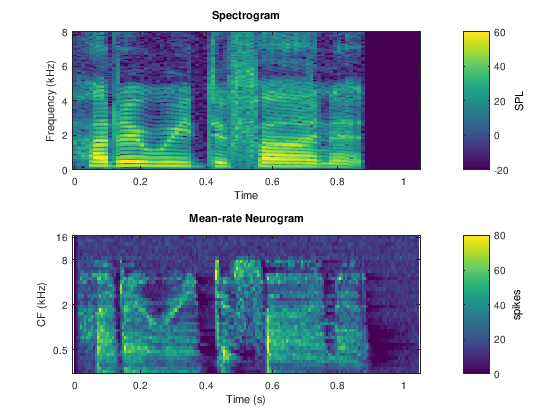

In [12]:

amt_disp();
neurogram_ft = out.neurogram_ft;
neurogram_mr = out.neurogram_mr;
neurogram_Sout = out.neurogram_Sout;
t_ft = out.t_ft;
t_mr = out.t_mr;
t_Sout = out.t_Sout;
CFs = out.fc;

ng1=figure;
set(ng1,'renderer','painters');
winlen = 256; % Window length for the spectrogram analyses
sp1 = subplot(2,1,1);
[s,f,t] = specgram([stim; eps*ones(round(t_mr(end)*Fs_stim)-length(stim),1)],winlen,Fs_stim,winlen,0.25*winlen);
imagesc(t,f/1e3,20*log10(abs(s)/sum(hanning(winlen))*sqrt(2)/20e-6));
axis xy; axis tight;
hcb = colorbar;
set(get(hcb,'ylabel'),'string','SPL')
caxis([stimdb-80 stimdb])
ylim([0 min([max(CFs/1e3) Fs_stim/2e3])])
xlabel('Time');
ylabel('Frequency (kHz)');
title('Spectrogram')
xl = xlim;
sp2=subplot(2,1,2);

plot_bruce2018(t_mr,CFs,neurogram_mr,sp2);

caxis([0 80])
title('Mean-rate Neurogram')
xlim(xl)



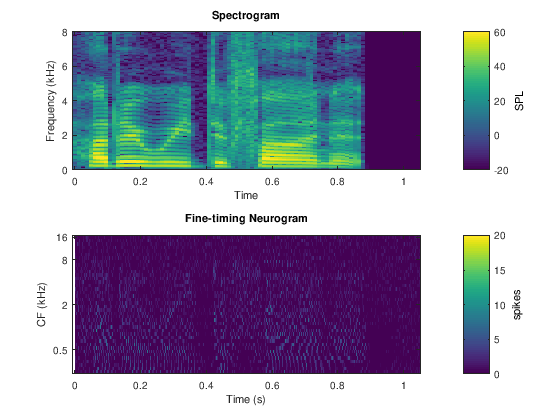

In [13]:
ng2=figure;
set(ng2,'renderer','painters');
winlen = 256; % Window length for the spectrogram analyses
sp1 = subplot(2,1,1);
[s,f,t] = specgram([stim; eps*ones(round(t_mr(end)*Fs_stim)-length(stim),1)],winlen,Fs_stim,winlen,0.25*winlen);
imagesc(t,f/1e3,20*log10(abs(s)/sum(hanning(winlen))*sqrt(2)/20e-6));
axis xy; axis tight;
hcb = colorbar;
set(get(hcb,'ylabel'),'string','SPL')
caxis([stimdb-80 stimdb])
ylim([0 min([max(CFs/1e3) Fs_stim/2e3])])
xlabel('Time');
ylabel('Frequency (kHz)');
title('Spectrogram')
xl = xlim;
sp2=subplot(2,1,2);
plot_bruce2018(t_ft,CFs,neurogram_ft,sp2);
caxis([0 20])
title('Fine-timing Neurogram')
xlim(xl)




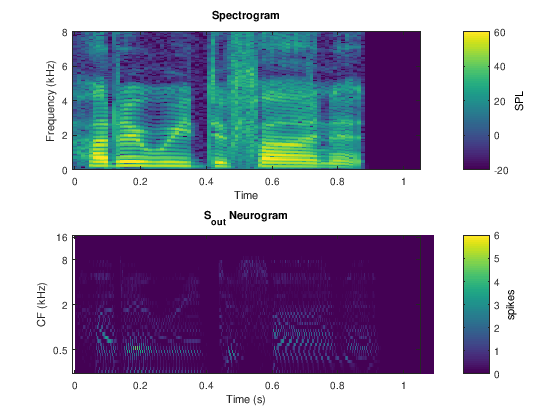

In [14]:
ng3=figure;
set(ng3,'renderer','painters');
winlen = 256; % Window length for the spectrogram analyses
sp1 = subplot(2,1,1);
[s,f,t] = specgram([stim; eps*ones(round(t_mr(end)*Fs_stim)-length(stim),1)],winlen,Fs_stim,winlen,0.25*winlen);
imagesc(t,f/1e3,20*log10(abs(s)/sum(hanning(winlen))*sqrt(2)/20e-6));
axis xy; axis tight;
hcb = colorbar;
set(get(hcb,'ylabel'),'string','SPL')
caxis([stimdb-80 stimdb])
ylim([0 min([max(CFs/1e3) Fs_stim/2e3])])
xlabel('Time');
ylabel('Frequency (kHz)');
title('Spectrogram')
xl = xlim;
sp2=subplot(2,1,2);
plot_bruce2018(t_Sout,CFs,neurogram_Sout*diff(t_Sout(1:2)),sp2);
caxis([0 6])
title('S_{out} Neurogram')
xlim(xl)
